## Escuela de Ingeniería en Computación, ITCR 

## Aprendizaje automático

 
### Quiz 03


Profesora: María Auxiliadora Mora

Estudiante: Marco Ferraro Rodríguez

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual

---

Resumen: En el presente quiz se realizarán ejercicios para repasar algunos conceptos sobre proyectos de clasificación binaria utilizando Python y PyTorch.

---



### 1. Problema

#### 1.1 Datos 

https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [61]:
import pandas as pd

df = pd.read_csv('./data/Reviews.csv')

df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### 1.2 Datos Faltantes

In [62]:
missing_values = df.isnull().sum()


print(missing_values)

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [63]:
df = df.dropna()
missing_values = df.isnull().sum()

print(missing_values)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


In [64]:
y = df['Score']
X = df[['Text']]

X.shape

(568411, 1)

In [65]:
regular_expresion = r'[^A-Za-z0-9\s]'


X['Text'] = X['Text'].str.replace(r'[^A-Za-z0-9\s]', '')

X.head()

C:\Users\Marco\AppData\Local\Temp\ipykernel_6972\3676562090.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X['Text'] = X['Text'].str.replace(r'[^A-Za-z0-9\s]', '')
C:\Users\Marco\AppData\Local\Temp\ipykernel_6972\3676562090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Text'] = X['Text'].str.replace(r'[^A-Za-z0-9\s]', '')


,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price There was a wide...


In [66]:
X['Text'] = X['Text'].str.lower()

X.head()

C:\Users\Marco\AppData\Local\Temp\ipykernel_6972\733488383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Text'] = X['Text'].str.lower()


,Text
0,i have bought several of the vitality canned d...
1,product arrived labeled as jumbo salted peanut...
2,this is a confection that has been around a fe...
3,if you are looking for the secret ingredient i...
4,great taffy at a great price there was a wide...


In [67]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to remove stop words from the 'Text' column
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

X['Text'] = X['Text'].apply(remove_stop_words)

X.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marco\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Marco\AppData\Local\Temp\ipykernel_6972\3301990764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Text'] = X['Text'].apply(remove_stop_words)


,Text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...
2,confection around centuries light pillowy citr...
3,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...


In [68]:
X = X['Text']

X.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [69]:
y.shape

(568411,)

### 2 Exploración y Visualización

#### 2.1 Histogramas

In [70]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

def plot_histogram(y):
    class_counts = y.value_counts(normalize=True) * 100
    plt.bar(class_counts.index, class_counts.values, align='center', alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Class')
    plt.ylabel('Percentage')
    plt.title('Class Distribution')

    # Format the labels on the bars to include the percentage symbol
    for i, v in enumerate(class_counts.values):
        plt.text(class_counts.index[i], v + 1, f'{v:.1f}%', ha='center')

    # Set the y-axis limits to reach 100%
    plt.ylim(0, 100)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    plt.show()

In [71]:
def plot_pie_chart(y):
    class_counts = y.value_counts(normalize=True) * 100
    class_labels = class_counts.index.tolist()
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'pink']
    plt.pie(class_counts, labels=class_labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Class Distribution')
    plt.axis('equal')

    plt.show()

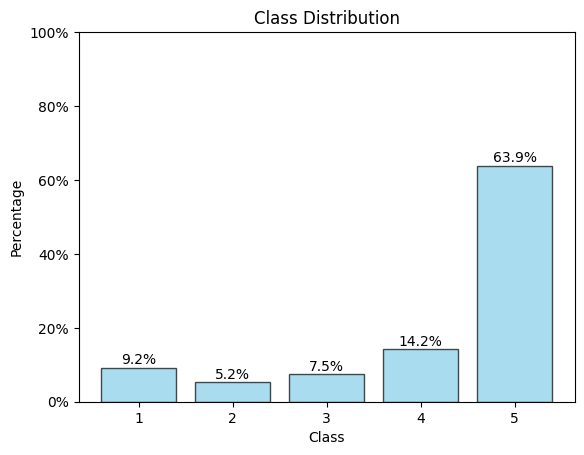

In [72]:
plot_histogram(y)

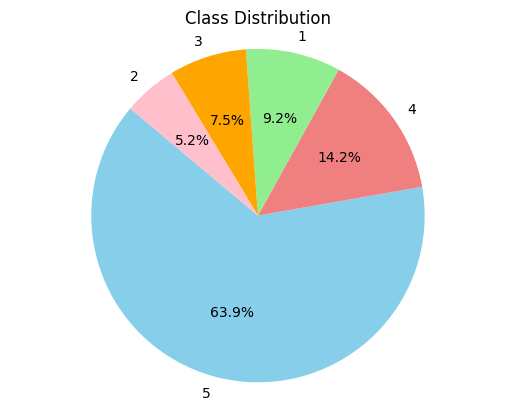

In [73]:
plot_pie_chart(y)

### 3 Definicion de Modelo

#### 3.1 Split de Datos

In [80]:
X[0]

'bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vocab
from sklearn.model_selection import train_test_split

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vocab
from sklearn.model_selection import train_test_split

# Assuming X and Y are already preprocessed and ready
X = ['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better']
y = [1]  # Assuming the class label for this sample is 1

# Tokenize the text data using torchtext tokenizer
tokenizer = get_tokenizer('basic_english')
tokens = tokenizer(X[0])


# Build the vocabulary using torchtext's build_vocab_from_iterator
vocab = build_vocab_from_iterator([tokens], specials=["<unk>", "<pad>"], special_first=True)

# Convert text data to numericalized tensors
def text_pipeline(text):
    tokens = tokenizer(text)
    numericalized = [vocab[token] for token in tokens]
    return torch.tensor(numericalized)

# Define a custom Dataset for text classification
class TextClassificationDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Dataset and DataLoader
dataset = TextClassificationDataset([text_pipeline(x) for x in X], y)
batch_size = 1  # As we only have one sample
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

# Define the LSTM model for multiclass classification
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, _ = self.lstm(embedded)
        return self.fc(output[:, -1, :])

# Initialize model parameters
embedding_dim = 100
hidden_dim = 256
output_dim = 5  # Assuming there are 5 classes (1, 2, 3, 4, 5)

# Create the LSTM model
model = LSTMClassifier(len(vocab), embedding_dim, hidden_dim, output_dim)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for batch_X, batch_y in data_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(data_loader):.4f}')

# You can then use this trained model for predictions.


Epoch [1/10], Loss: 1.5843
Epoch [2/10], Loss: 1.3229
Epoch [3/10], Loss: 1.0796
Epoch [4/10], Loss: 0.8443
Epoch [5/10], Loss: 0.6169
Epoch [6/10], Loss: 0.4085
Epoch [7/10], Loss: 0.2378
Epoch [8/10], Loss: 0.1197
Epoch [9/10], Loss: 0.0530
Epoch [10/10], Loss: 0.0217
